CODE TO IMPORT TEST IMAGE IN GOOGLE COLLAB


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
from PIL import Image
import matplotlib.pyplot as plt

In [ ]:

class LeNet5(nn.Module):
    def __init__(self):
        super(LeNet5, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=6, kernel_size=5, stride=1, padding=2)
        self.conv2 = nn.Conv2d(in_channels=6, out_channels=16, kernel_size=5, stride=1)
        self.fc1 = nn.Linear(in_features=16 * 5 * 5, out_features=120)
        self.fc2 = nn.Linear(in_features=120, out_features=84)
        self.fc3 = nn.Linear(in_features=84, out_features=10)

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = F.avg_pool2d(x, kernel_size=2)
        x = F.relu(self.conv2(x))
        x = F.avg_pool2d(x, kernel_size=2)
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = LeNet5().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])
train_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = datasets.MNIST(root='./data', train=False, download=True, transform=transform)
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)


Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9.91M/9.91M [00:00<00:00, 134MB/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28.9k/28.9k [00:00<00:00, 31.7MB/s]

Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1.65M/1.65M [00:00<00:00, 91.4MB/s]

Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4.54k/4.54k [00:00<00:00, 3.04MB/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



Training with Learning Rate: 0.01, Batch Size: 32
Epoch 1/10, Loss: 0.1710, Accuracy: 95.03%
Epoch 2/10, Loss: 0.0986, Accuracy: 97.55%
Epoch 3/10, Loss: 0.0868, Accuracy: 97.89%
Epoch 4/10, Loss: 0.0785, Accuracy: 98.07%
Epoch 5/10, Loss: 0.0786, Accuracy: 98.15%
Epoch 6/10, Loss: 0.0756, Accuracy: 98.26%
Epoch 7/10, Loss: 0.0703, Accuracy: 98.39%
Epoch 8/10, Loss: 0.0674, Accuracy: 98.42%
Epoch 9/10, Loss: 0.0693, Accuracy: 98.44%
Epoch 10/10, Loss: 0.0648, Accuracy: 98.51%
Test Accuracy: 98.31%



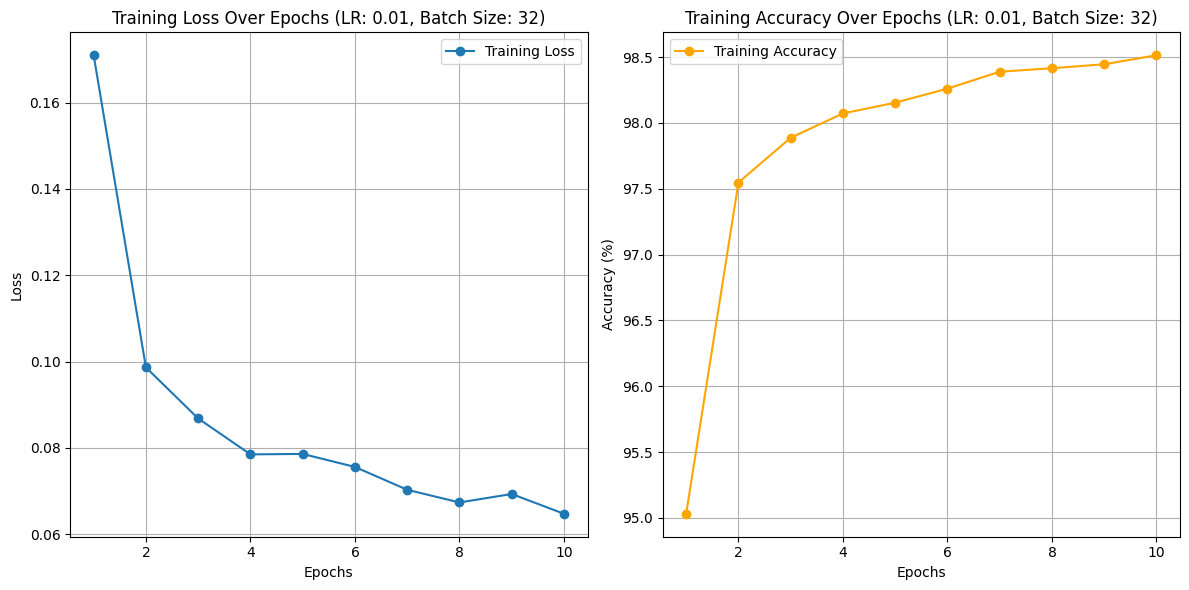

Training with Learning Rate: 0.01, Batch Size: 64
Epoch 1/10, Loss: 0.1580, Accuracy: 95.18%
Epoch 2/10, Loss: 0.0735, Accuracy: 97.94%
Epoch 3/10, Loss: 0.0613, Accuracy: 98.34%
Epoch 4/10, Loss: 0.0586, Accuracy: 98.43%
Epoch 5/10, Loss: 0.0538, Accuracy: 98.59%
Epoch 6/10, Loss: 0.0466, Accuracy: 98.86%
Epoch 7/10, Loss: 0.0494, Accuracy: 98.75%
Epoch 8/10, Loss: 0.0480, Accuracy: 98.85%
Epoch 9/10, Loss: 0.0485, Accuracy: 98.86%
Epoch 10/10, Loss: 0.0425, Accuracy: 99.00%
Test Accuracy: 98.28%



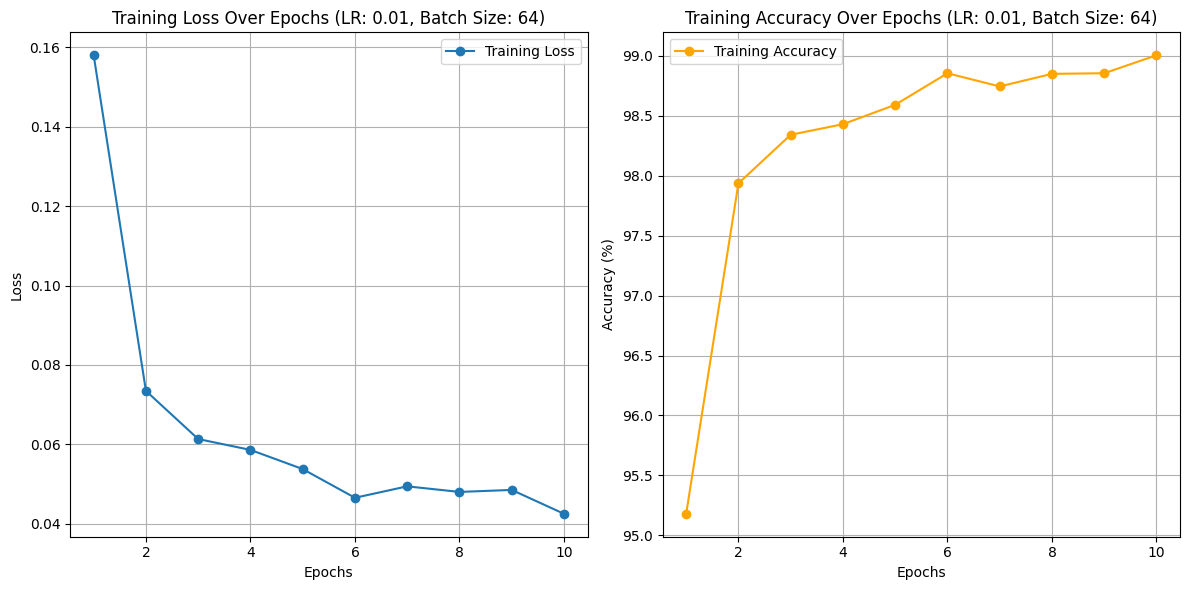

Training with Learning Rate: 0.01, Batch Size: 128
Epoch 1/10, Loss: 0.1999, Accuracy: 93.64%
Epoch 2/10, Loss: 0.0597, Accuracy: 98.26%
Epoch 3/10, Loss: 0.0475, Accuracy: 98.58%
Epoch 4/10, Loss: 0.0413, Accuracy: 98.78%
Epoch 5/10, Loss: 0.0418, Accuracy: 98.81%
Epoch 6/10, Loss: 0.0383, Accuracy: 98.92%
Epoch 7/10, Loss: 0.0354, Accuracy: 99.02%
Epoch 8/10, Loss: 0.0358, Accuracy: 99.00%
Epoch 9/10, Loss: 0.0327, Accuracy: 99.03%
Epoch 10/10, Loss: 0.0324, Accuracy: 99.14%
Test Accuracy: 98.74%



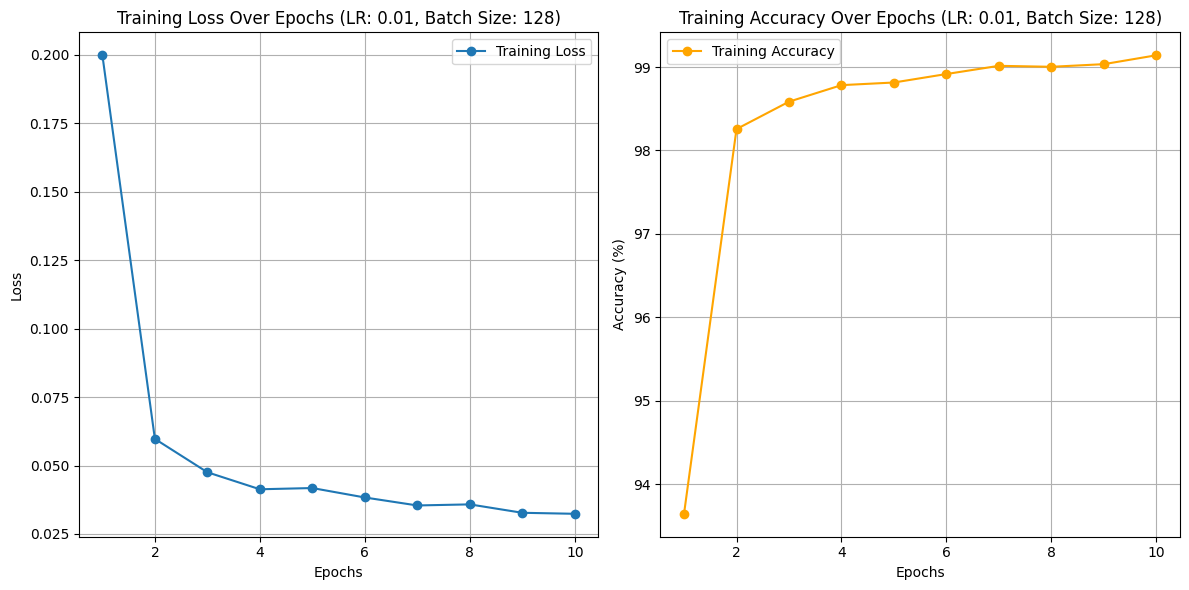

Best Hyperparameters -> Learning Rate: 0.01, Batch Size: 128
Best Test Accuracy: 98.74%


In [ ]:
import itertools

learning_rates = [0.01]
batch_sizes = [32, 64, 128]
epochs = 10


transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])


def evaluate_model(model, test_loader):
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    return 100 * correct / total


results = []

for lr, batch_size in itertools.product(learning_rates, batch_sizes):
    print(f"Training with Learning Rate: {lr}, Batch Size: {batch_size}")


    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
    test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)


    model = LeNet5().to(device)
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=lr)


    train_losses = []
    train_accuracies = []

    for epoch in range(epochs):
        model.train()
        running_loss = 0.0
        correct = 0
        total = 0

        for inputs, labels in train_loader:
            inputs, labels = inputs.to(device), labels.to(device)


            outputs = model(inputs)
            loss = criterion(outputs, labels)


            optimizer.zero_grad()
            loss.backward()
            optimizer.step()


            running_loss += loss.item()
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()


        avg_loss = running_loss / len(train_loader)
        accuracy = 100 * correct / total


        train_losses.append(avg_loss)
        train_accuracies.append(accuracy)

        print(f"Epoch {epoch+1}/{epochs}, Loss: {avg_loss:.4f}, Accuracy: {accuracy:.2f}%")


    test_accuracy = evaluate_model(model, test_loader)
    results.append((lr, batch_size, test_accuracy))
    print(f"Test Accuracy: {test_accuracy:.2f}%\n")


    plt.figure(figsize=(12, 6))


    plt.subplot(1, 2, 1)
    plt.plot(range(1, epochs + 1), train_losses, marker='o', label='Training Loss')
    plt.title(f'Training Loss Over Epochs (LR: {lr}, Batch Size: {batch_size})')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.grid(True)
    plt.legend()


    plt.subplot(1, 2, 2)
    plt.plot(range(1, epochs + 1), train_accuracies, marker='o', color='orange', label='Training Accuracy')
    plt.title(f'Training Accuracy Over Epochs (LR: {lr}, Batch Size: {batch_size})')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy (%)')
    plt.grid(True)
    plt.legend()

    plt.tight_layout()
    plt.show()


best_result = max(results, key=lambda x: x[2])
print(f"Best Hyperparameters -> Learning Rate: {best_result[0]}, Batch Size: {best_result[1]}")
print(f"Best Test Accuracy: {best_result[2]:.2f}%")


CONFUSION MATRIX

In [ ]:

confusion_matrix = torch.zeros(10, 10, dtype=torch.int64)
all_labels = []
all_preds = []

with torch.no_grad():
    for inputs, labels in test_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)
        _, predicted = torch.max(outputs, 1)
        all_labels.extend(labels.cpu().numpy())
        all_preds.extend(predicted.cpu().numpy())


        for true_label, pred_label in zip(labels, predicted):
            confusion_matrix[true_label, pred_label] += 1


print("Confusion Matrix:\n", confusion_matrix)


precision = []
recall = []
f1_score = []

for i in range(10):
    tp = confusion_matrix[i, i].item()
    fp = confusion_matrix[:, i].sum().item() - tp
    fn = confusion_matrix[i, :].sum().item() - tp
    precision_i = tp / (tp + fp) if (tp + fp) > 0 else 0
    recall_i = tp / (tp + fn) if (tp + fn) > 0 else 0
    f1_i = 2 * precision_i * recall_i / (precision_i + recall_i) if (precision_i + recall_i) > 0 else 0
    precision.append(precision_i)
    recall.append(recall_i)
    f1_score.append(f1_i)

for i in range(10):
    print(f"Class {i}: Precision={precision[i]:.4f}, Recall={recall[i]:.4f}, F1-Score={f1_score[i]:.4f}")
avg_precision = sum(precision) / len(precision)
avg_recall = sum(recall) / len(recall)
avg_f1_score = sum(f1_score) / len(f1_score)
print(f"Average Precision: {avg_precision:.4f}")
print(f"Average Recall: {avg_recall:.4f}")
print(f"Average F1-Score: {avg_f1_score:.4f}")


Confusion Matrix:
 tensor([[ 972,    0,    1,    0,    0,    0,    5,    1,    1,    0],
        [   0, 1134,    0,    0,    0,    0,    0,    0,    1,    0],
        [   1,    0, 1025,    1,    0,    0,    2,    3,    0,    0],
        [   0,    0,    0, 1003,    1,    3,    0,    1,    2,    0],
        [   0,    0,    1,    0,  972,    0,    3,    0,    2,    4],
        [   0,    0,    0,    2,    0,  885,    1,    1,    3,    0],
        [   3,    5,    0,    1,    3,    3,  939,    0,    4,    0],
        [   0,    6,    3,    1,    1,    0,    0, 1012,    3,    2],
        [   1,    1,    1,    2,    0,    2,    0,    1,  966,    0],
        [   0,    1,    0,    2,    9,    4,    2,    5,   20,  966]])


# TESTING ONE IMAGE UPLOADED TO GOOGLE COLLAB

Test Accuracy on Dataset: 98.74%


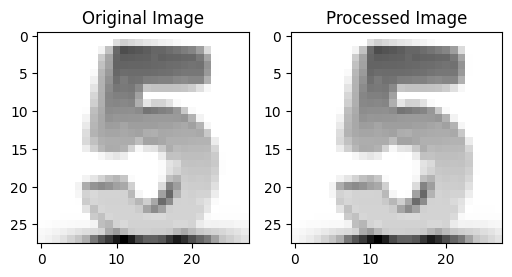

Predicted Class for Custom Image: 6


In [ ]:

model.eval()
correct = 0
total = 0

with torch.no_grad():
    for inputs, labels in test_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f"Test Accuracy on Dataset: {100 * correct / total:.2f}%")


test_image_path = '/content/Screenshot 2024-12-05 185039.png'
predicted_class = test_single_image(test_image_path, model, transform)
print(f"Predicted Class for Custom Image: {predicted_class}")


# GOOGLE DRIVE

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Found 4 images.


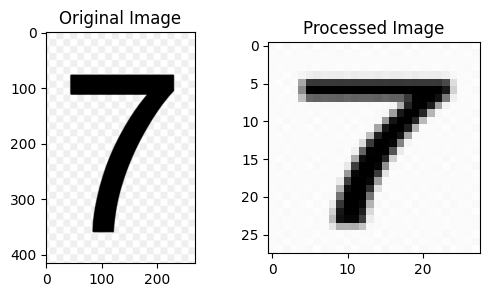

Image: /content/drive/My Drive/test_images/Screenshot 2024-12-06 173335.png, Predicted Class: 7


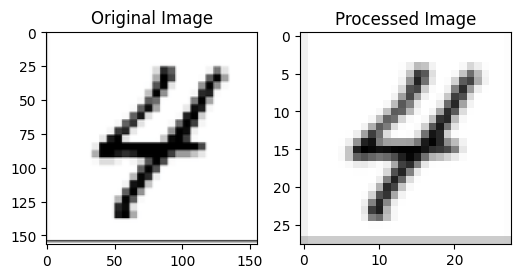

Image: /content/drive/My Drive/test_images/Screenshot 2024-12-05 192948.png, Predicted Class: 4


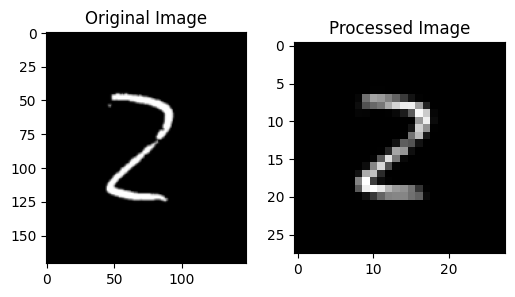

Image: /content/drive/My Drive/test_images/Screenshot 2024-12-18 200343.png, Predicted Class: 2


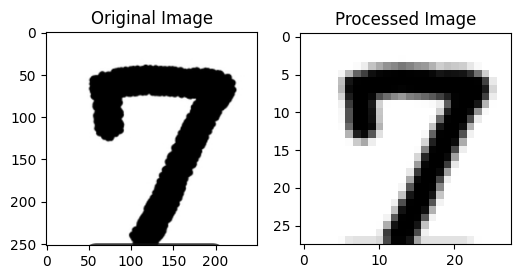

Image: /content/drive/My Drive/test_images/Screenshot 2024-12-06 173445.png, Predicted Class: 5


In [ ]:
from google.colab import drive
import os
import cv2
import torch
from torchvision import transforms
from PIL import Image
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow


drive.mount('/content/drive')


test_images_folder = '/content/drive/My Drive/test_images'


image_files = [os.path.join(test_images_folder, f) for f in os.listdir(test_images_folder) if f.endswith(('.png', '.jpg', '.jpeg'))]
print(f"Found {len(image_files)} images.")


transform = transforms.Compose([
    transforms.Grayscale(num_output_channels=1),
    transforms.Resize((28, 28)),
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])


def test_single_image(image_path, model, transform):

    model.eval()


    image = Image.open(image_path).convert('RGB')
    original_image = cv2.cvtColor(cv2.imread(image_path), cv2.COLOR_BGR2RGB)


    processed_image = transform(image).unsqueeze(0).to(device)


    plt.figure(figsize=(6, 3))
    plt.subplot(1, 2, 1)
    plt.imshow(original_image)
    plt.title("Original Image")

    plt.subplot(1, 2, 2)
    plt.imshow(processed_image.squeeze().cpu().numpy(), cmap='gray')
    plt.title("Processed Image")
    plt.show()


    with torch.no_grad():
        output = model(processed_image)
        _, predicted = torch.max(output, 1)

    return original_image, predicted.item()


model.eval()
for image_path in image_files:
    original_image, predicted_class = test_single_image(image_path, model, transform)
    print(f"Image: {image_path}, Predicted Class: {predicted_class}")




Found 4 images.


In [ ]:
import torch     #used while applying deep learning
import torch.nn as nn     #Imports PyTorch's neural network module, which includes classes for building and training neural networks.
import torch.optim as optim     #implementing optimization algorithms like SGD and Adam
from torchvision import datasets, transforms     #for preprocessing
from torch.utils.data import DataLoader      # load datasets in batches for training and testing
import matplotlib.pyplot as plt      # interactive and animated visualizations
import seaborn as sns       # informative statistical graphics
from sklearn.metrics import confusion_matrix       #used for classification model evaluation
import numpy as np

# Define the transformations for the MNIST dataset
transform = transforms.Compose([
    transforms.ToTensor(),  # Convert image to PyTorch tensor
    transforms.Normalize((0.5,), (0.5,))  # Normalize to mean 0.5 and std 0.5
])

# Download and load the MNIST dataset
train_dataset = datasets.MNIST(root='./data', train=True, transform=transform, download=True)
test_dataset = datasets.MNIST(root='./data', train=False, transform=transform, download=True)

# Create DataLoaders for training and testing datasets
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

# Define the CNN model
class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()

        # Convolutional layers
        self.conv1 = nn.Conv2d(1, 16, kernel_size=3, stride=1, padding=1)  # 1 input channel, 16 output channels
        self.conv2 = nn.Conv2d(16, 32, kernel_size=3, stride=1, padding=1) # 16 input channels, 32 output channels

        # Pooling layer
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)

        # Fully connected layers
        self.fc1 = nn.Linear(32 * 7 * 7, 512)  # 32 channels with 7x7 feature maps after pooling
        self.fc2 = nn.Linear(512, 256)
        self.fc3 = nn.Linear(256, 10)

        # Activation, dropout, and batch normalization
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(0.3)
        self.bn1 = nn.BatchNorm1d(512)
        self.bn2 = nn.BatchNorm1d(256)

    def forward(self, x):
        # Convolutional layers with ReLU and pooling
        x = self.pool(self.relu(self.conv1(x)))
        x = self.pool(self.relu(self.conv2(x)))

        # Flatten the tensor
        x = x.view(-1, 32 * 7 * 7)

        # Fully connected layers with ReLU, dropout, and batch normalization
        x = self.relu(self.bn1(self.fc1(x)))
        x = self.dropout(x)
        x = self.relu(self.bn2(self.fc2(x)))
        x = self.dropout(x)
        x = self.fc3(x)

        return x


# Instantiate the model, loss function, and optimizer
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = SimpleCNN().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)


# Training loop
epochs = 10
for epoch in range(epochs):
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0

    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)

        # Forward pass
        outputs = model(inputs)
        loss = criterion(outputs, labels)

        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # Calculate statistics
        running_loss += loss.item()
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    print(f"Epoch {epoch+1}/{epochs}, Loss: {running_loss/len(train_loader):.4f}, Accuracy: {100 * correct / total:.2f}%")

# Testing loop
model.eval()
correct = 0
total = 0

with torch.no_grad():
    for inputs, labels in test_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f"Test Accuracy: {100 * correct / total:.2f}%")




Epoch 1/10, Loss: 0.1171, Accuracy: 96.70%
Epoch 2/10, Loss: 0.0506, Accuracy: 98.45%
Epoch 3/10, Loss: 0.0365, Accuracy: 98.88%
Epoch 4/10, Loss: 0.0319, Accuracy: 99.02%
Epoch 5/10, Loss: 0.0264, Accuracy: 99.14%
Epoch 6/10, Loss: 0.0214, Accuracy: 99.33%
Epoch 7/10, Loss: 0.0204, Accuracy: 99.33%
Epoch 8/10, Loss: 0.0178, Accuracy: 99.43%
Epoch 9/10, Loss: 0.0147, Accuracy: 99.52%
Epoch 10/10, Loss: 0.0137, Accuracy: 99.54%
Test Accuracy: 99.14%


calculating the confusion matrix

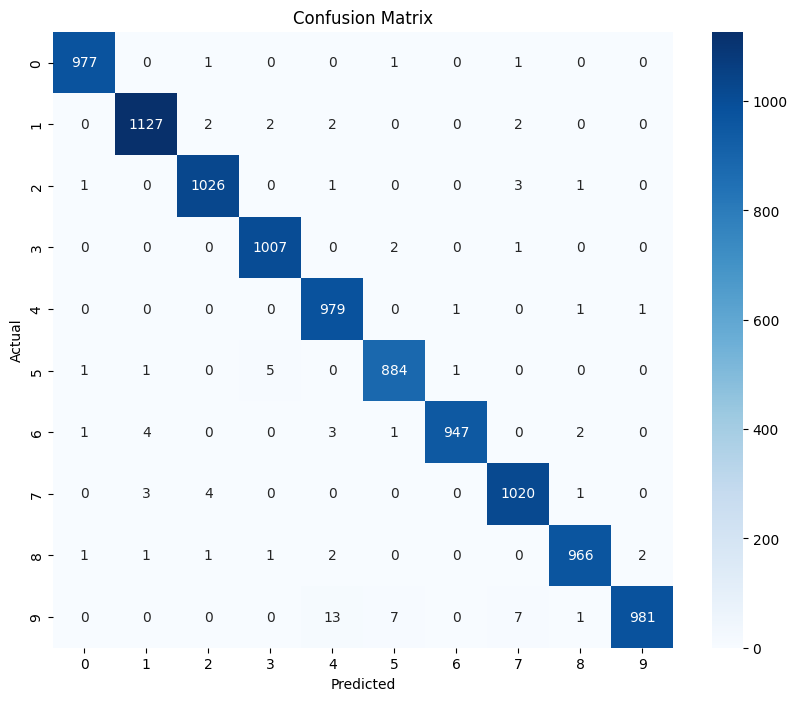

Class 0: Precision=0.9959, Recall=0.9969, F1-Score=0.9964
Class 1: Precision=0.9921, Recall=0.9930, F1-Score=0.9925
Class 2: Precision=0.9923, Recall=0.9942, F1-Score=0.9932
Class 3: Precision=0.9921, Recall=0.9970, F1-Score=0.9946
Class 4: Precision=0.9790, Recall=0.9969, F1-Score=0.9879
Class 5: Precision=0.9877, Recall=0.9910, F1-Score=0.9894
Class 6: Precision=0.9979, Recall=0.9885, F1-Score=0.9932
Class 7: Precision=0.9865, Recall=0.9922, F1-Score=0.9893
Class 8: Precision=0.9938, Recall=0.9918, F1-Score=0.9928
Class 9: Precision=0.9970, Recall=0.9722, F1-Score=0.9844
Average Precision: 0.9914
Average Recall: 0.9914
Average F1-Score: 0.9914


In [ ]:

# Confusion Matrix
confusion_matrix = torch.zeros(10, 10, dtype=torch.int64)
all_labels = []
all_preds = []

with torch.no_grad():
    for inputs, labels in test_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)
        _, predicted = torch.max(outputs, 1)
        all_labels.extend(labels.cpu().numpy())
        all_preds.extend(predicted.cpu().numpy())

        for true_label, pred_label in zip(labels, predicted):
            confusion_matrix[true_label, pred_label] += 1

# Plot Confusion Matrix
plt.figure(figsize=(10, 8))
sns.heatmap(confusion_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=list(range(10)), yticklabels=list(range(10)))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()



precision = []
recall = []
f1_score = []

for i in range(10):
    tp = confusion_matrix[i, i].item()
    fp = confusion_matrix[:, i].sum().item() - tp
    fn = confusion_matrix[i, :].sum().item() - tp
    precision_i = tp / (tp + fp) if (tp + fp) > 0 else 0
    recall_i = tp / (tp + fn) if (tp + fn) > 0 else 0
    f1_i = 2 * precision_i * recall_i / (precision_i + recall_i) if (precision_i + recall_i) > 0 else 0
    precision.append(precision_i)
    recall.append(recall_i)
    f1_score.append(f1_i)

for i in range(10):
    print(f"Class {i}: Precision={precision[i]:.4f}, Recall={recall[i]:.4f}, F1-Score={f1_score[i]:.4f}")
avg_precision = sum(precision) / len(precision)
avg_recall = sum(recall) / len(recall)
avg_f1_score = sum(f1_score) / len(f1_score)
print(f"Average Precision: {avg_precision:.4f}")
print(f"Average Recall: {avg_recall:.4f}")
print(f"Average F1-Score: {avg_f1_score:.4f}")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Found 4 images.


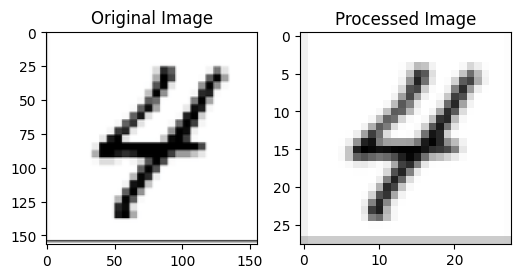

Image: /content/drive/My Drive/test_images/Screenshot 2024-12-05 192948.png, Predicted Class: 0


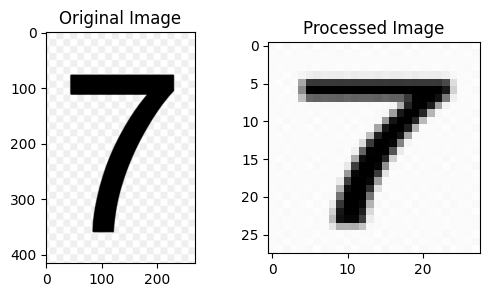

Image: /content/drive/My Drive/test_images/Screenshot 2024-12-06 173335.png, Predicted Class: 0


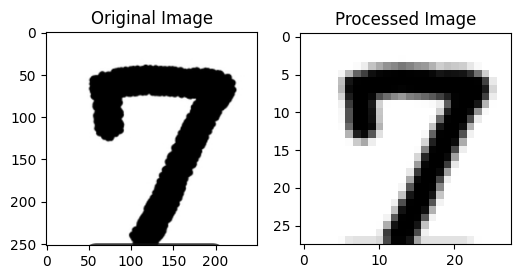

Image: /content/drive/My Drive/test_images/Screenshot 2024-12-06 173445.png, Predicted Class: 0


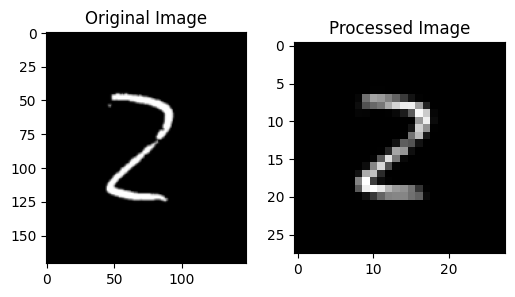

Image: /content/drive/My Drive/test_images/Screenshot 2024-12-18 200343.png, Predicted Class: 2


In [ ]:
from google.colab import drive
import os
import cv2
import torch
from torchvision import transforms
from PIL import Image
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

# Mount Google Drive
drive.mount('/content/drive')

# Define test images folder path
test_images_folder = '/content/drive/My Drive/test_images'

# Load all image file paths
image_files = [os.path.join(test_images_folder, f) for f in os.listdir(test_images_folder) if f.endswith(('.png', '.jpg', '.jpeg'))]
print(f"Found {len(image_files)} images.")

# Define normalization techniques
normalization_options = {
    'zero_one': transforms.Normalize((0.0,), (1.0,)),  # Scale [0, 1]
    'minus_one_one': transforms.Normalize((0.5,), (0.5,)),  # Scale [-1, 1]
    'mean_std': transforms.Normalize((0.5,), (0.25,))  # Custom mean and std deviation
}

# Choose the normalization technique
selected_normalization = normalization_options['minus_one_one']  # Change this to test others

# Define transformation pipeline
transform = transforms.Compose([
    transforms.Grayscale(num_output_channels=1),
    transforms.Resize((28, 28)),
    transforms.ToTensor(),
    selected_normalization
])

# Function to test a single image
def test_single_image(image_path, model, transform):
    # Set model to evaluation mode
    model.eval()

    # Load and preprocess the image
    image = Image.open(image_path).convert('RGB')
    original_image = cv2.cvtColor(cv2.imread(image_path), cv2.COLOR_BGR2RGB)

    # Apply transformations
    processed_image = transform(image).unsqueeze(0).to(device)

    # Display original and processed images
    plt.figure(figsize=(6, 3))
    plt.subplot(1, 2, 1)
    plt.imshow(original_image)
    plt.title("Original Image")

    plt.subplot(1, 2, 2)
    plt.imshow(processed_image.squeeze().cpu().numpy(), cmap='gray')
    plt.title("Processed Image")
    plt.show()

    # Perform inference
    with torch.no_grad():
        output = model(processed_image)
        _, predicted = torch.max(output, 1)

    return original_image, predicted.item()

# Loop through and test each image
model.eval()
for image_path in image_files:
    original_image, predicted_class = test_single_image(image_path, model, transform)
    print(f"Image: {image_path}, Predicted Class: {predicted_class}")




SECTION 2

# MLP MODEL

IMPLEMENTING THE MLP MODEL

In [ ]:
#importing the required libraries
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

#enhanced mlp class
class EnhancedMLP(nn.Module):
    def __init__(self):
        super(EnhancedMLP, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 1024)
        self.fc2 = nn.Linear(1024, 512)
        self.fc3 = nn.Linear(512, 256)
        self.fc4 = nn.Linear(256, 128)
        self.fc5 = nn.Linear(128, 10)
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(0.3)
        self.bn1 = nn.BatchNorm1d(1024)
        self.bn2 = nn.BatchNorm1d(512)
        self.bn3 = nn.BatchNorm1d(256)
        self.bn4 = nn.BatchNorm1d(128)

    def forward(self, x):
        x = x.view(-1, 28 * 28)
        x = self.relu(self.bn1(self.fc1(x)))
        x = self.dropout(x)
        x = self.relu(self.bn2(self.fc2(x)))
        x = self.dropout(x)
        x = self.relu(self.bn3(self.fc3(x)))
        x = self.dropout(x)
        x = self.relu(self.bn4(self.fc4(x)))
        x = self.dropout(x)
        x = self.fc5(x)
        return x

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
#transformation
transform = transforms.Compose([
    transforms.RandomRotation(10),
    transforms.RandomAffine(0, translate=(0.1, 0.1)),
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

#loading the mnist dataset
train_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = datasets.MNIST(root='./data', train=False, download=True, transform=transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
]))
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)
model = EnhancedMLP().to(device)
criterion = nn.CrossEntropyLoss(label_smoothing=0.1)
optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay=1e-5)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=3, gamma=0.5)

epochs = 20
for epoch in range(epochs):
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0
    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
    scheduler.step()
    print(f"Epoch {epoch+1}/{epochs}, Loss: {running_loss/len(train_loader):.4f}, Accuracy: {100 * correct / total:.2f}%")

#testing
model.eval()
correct = 0
total = 0
with torch.no_grad():
    for inputs, labels in test_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
print(f"Test Accuracy: {100 * correct / total:.2f}%")


Epoch 1/20, Loss: 0.9463, Accuracy: 82.84%
Epoch 2/20, Loss: 0.7521, Accuracy: 91.01%
Epoch 3/20, Loss: 0.7088, Accuracy: 92.63%
Epoch 4/20, Loss: 0.6712, Accuracy: 94.13%
Epoch 5/20, Loss: 0.6581, Accuracy: 94.67%
Epoch 6/20, Loss: 0.6502, Accuracy: 94.96%
Epoch 7/20, Loss: 0.6373, Accuracy: 95.45%
Epoch 8/20, Loss: 0.6277, Accuracy: 95.88%
Epoch 9/20, Loss: 0.6250, Accuracy: 95.98%
Epoch 10/20, Loss: 0.6166, Accuracy: 96.25%
Epoch 11/20, Loss: 0.6148, Accuracy: 96.26%
Epoch 12/20, Loss: 0.6114, Accuracy: 96.51%
Epoch 13/20, Loss: 0.6093, Accuracy: 96.53%
Epoch 14/20, Loss: 0.6082, Accuracy: 96.58%
Epoch 15/20, Loss: 0.6057, Accuracy: 96.66%
Epoch 16/20, Loss: 0.6043, Accuracy: 96.69%
Epoch 17/20, Loss: 0.6034, Accuracy: 96.73%
Epoch 18/20, Loss: 0.6017, Accuracy: 96.83%
Epoch 19/20, Loss: 0.6037, Accuracy: 96.78%
Epoch 20/20, Loss: 0.6005, Accuracy: 96.86%
Test Accuracy: 99.06%


confusion matric and metrics calculations

In [ ]:

# Confusion Matrix
confusion_matrix = torch.zeros(10, 10, dtype=torch.int64)
all_labels = []
all_preds = []

with torch.no_grad():
    for inputs, labels in test_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)
        _, predicted = torch.max(outputs, 1)
        all_labels.extend(labels.cpu().numpy())
        all_preds.extend(predicted.cpu().numpy())

        for true_label, pred_label in zip(labels, predicted):
            confusion_matrix[true_label, pred_label] += 1

# Plot Confusion Matrix
plt.figure(figsize=(10, 8))
sns.heatmap(confusion_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=list(range(10)), yticklabels=list(range(10)))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()



precision = []
recall = []
f1_score = []

for i in range(10):
    tp = confusion_matrix[i, i].item()
    fp = confusion_matrix[:, i].sum().item() - tp
    fn = confusion_matrix[i, :].sum().item() - tp
    precision_i = tp / (tp + fp) if (tp + fp) > 0 else 0
    recall_i = tp / (tp + fn) if (tp + fn) > 0 else 0
    f1_i = 2 * precision_i * recall_i / (precision_i + recall_i) if (precision_i + recall_i) > 0 else 0
    precision.append(precision_i)
    recall.append(recall_i)
    f1_score.append(f1_i)

for i in range(10):
    print(f"Class {i}: Precision={precision[i]:.4f}, Recall={recall[i]:.4f}, F1-Score={f1_score[i]:.4f}")
avg_precision = sum(precision) / len(precision)
avg_recall = sum(recall) / len(recall)
avg_f1_score = sum(f1_score) / len(f1_score)
print(f"Average Precision: {avg_precision:.4f}")
print(f"Average Recall: {avg_recall:.4f}")
print(f"Average F1-Score: {avg_f1_score:.4f}")

Confusion Matrix:
 tensor([[ 972,    0,    1,    0,    0,    0,    5,    1,    1,    0],
        [   0, 1134,    0,    0,    0,    0,    0,    0,    1,    0],
        [   1,    0, 1025,    1,    0,    0,    2,    3,    0,    0],
        [   0,    0,    0, 1003,    1,    3,    0,    1,    2,    0],
        [   0,    0,    1,    0,  972,    0,    3,    0,    2,    4],
        [   0,    0,    0,    2,    0,  885,    1,    1,    3,    0],
        [   3,    5,    0,    1,    3,    3,  939,    0,    4,    0],
        [   0,    6,    3,    1,    1,    0,    0, 1012,    3,    2],
        [   1,    1,    1,    2,    0,    2,    0,    1,  966,    0],
        [   0,    1,    0,    2,    9,    4,    2,    5,   20,  966]])


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Found 4 images.


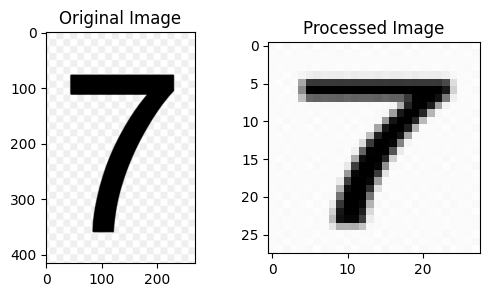

Image: /content/drive/My Drive/test_images/Screenshot 2024-12-06 173335.png, Predicted Class: 7


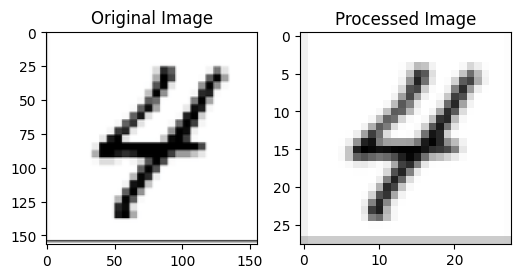

Image: /content/drive/My Drive/test_images/Screenshot 2024-12-05 192948.png, Predicted Class: 4


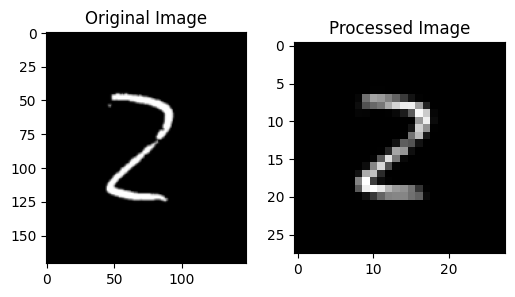

Image: /content/drive/My Drive/test_images/Screenshot 2024-12-18 200343.png, Predicted Class: 2


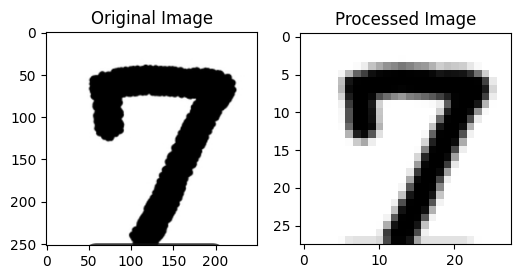

Image: /content/drive/My Drive/test_images/Screenshot 2024-12-06 173445.png, Predicted Class: 5


In [ ]:
from google.colab import drive
import os
import cv2
import torch
from torchvision import transforms
from PIL import Image
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow


drive.mount('/content/drive')


test_images_folder = '/content/drive/My Drive/test_images'


image_files = [os.path.join(test_images_folder, f) for f in os.listdir(test_images_folder) if f.endswith(('.png', '.jpg', '.jpeg'))]
print(f"Found {len(image_files)} images.")


transform = transforms.Compose([
    transforms.Grayscale(num_output_channels=1),
    transforms.Resize((28, 28)),
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])


def test_single_image(image_path, model, transform):

    model.eval()


    image = Image.open(image_path).convert('RGB')
    original_image = cv2.cvtColor(cv2.imread(image_path), cv2.COLOR_BGR2RGB)


    processed_image = transform(image).unsqueeze(0).to(device)


    plt.figure(figsize=(6, 3))
    plt.subplot(1, 2, 1)
    plt.imshow(original_image)
    plt.title("Original Image")

    plt.subplot(1, 2, 2)
    plt.imshow(processed_image.squeeze().cpu().numpy(), cmap='gray')
    plt.title("Processed Image")
    plt.show()


    with torch.no_grad():
        output = model(processed_image)
        _, predicted = torch.max(output, 1)

    return original_image, predicted.item()


model.eval()
for image_path in image_files:
    original_image, predicted_class = test_single_image(image_path, model, transform)
    print(f"Image: {image_path}, Predicted Class: {predicted_class}")


